In [1]:
import sys
import os

from IPython import display
from time import time
from collections import Counter
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

print(os.getcwd())
inputPath = 'C:\\Users\\idstwy\\Desktop\\SSHSPH\\SPH6004 Advanced Statistical Learning\\Assignment\\Group\\Data'

C:\Users\idstwy\Desktop\SSHSPH\SPH6004 Advanced Statistical Learning\Assignment\Group\Codes


# read data files

In [2]:
#==============
#read data files
#==============
chartLimit = pd.read_excel(inputPath + "\\lower-upper limit.xlsx", sheet_name="updated", header=0)

d1 = pd.read_csv(inputPath + "\\d_master_3hourly.csv", index_col=None, parse_dates=['icu_intime', "charttime", 'aki_charttime'])
d1["AKI"] = np.where(d1["aki_charttime"].isnull(),0,1)
d1 = d1.sort_values(by=["stay_id", 'charttime'], ascending=True)
d1 = d1.reset_index(drop=True)
print(d1.shape)
print(list(d1.columns))
d1.head(3)

(123138, 68)
['stay_id', 'icu_intime', 'charttime', 'aki_charttime', 't_ICU2Chart', 't_ICU2AKI', 't_Chart2AKI', 'adm_age', 'weight', 'charlson_comorbidity_index', 'age_score', 'myocardial_infarct', 'congestive_heart_failure', 'peripheral_vascular_disease', 'cerebrovascular_disease', 'dementia', 'chronic_pulmonary_disease', 'rheumatic_disease', 'peptic_ulcer_disease', 'mild_liver_disease', 'diabetes_without_cc', 'diabetes_with_cc', 'paraplegia', 'renal_disease', 'malignant_cancer', 'severe_liver_disease', 'metastatic_solid_tumor', 'aids', 'so2', 'po2', 'pco2', 'fio2_chartevents', 'fio2', 'aado2', 'aado2_calc', 'pao2fio2ratio', 'ph', 'baseexcess', 'bicarbonate', 'totalco2', 'hematocrit', 'hemoglobin', 'carboxyhemoglobin', 'methemoglobin', 'chloride', 'calcium', 'temperature', 'potassium', 'sodium', 'lactate', 'glucose', 'heart_rate_avg', 'sbp_avg', 'dbp_avg', 'sbp_ni_avg', 'dbp_ni_avg', 'mbp_ni_avg', 'tmp_avg', 'spo2_avg', 'glucose_avg', 'Med_Aminoglycosides', 'Med_Angiotensin', 'Med_Diu

,stay_id,icu_intime,charttime,aki_charttime,t_ICU2Chart,t_ICU2AKI,t_Chart2AKI,adm_age,weight,charlson_comorbidity_index,age_score,myocardial_infarct,congestive_heart_failure,peripheral_vascular_disease,cerebrovascular_disease,dementia,chronic_pulmonary_disease,rheumatic_disease,peptic_ulcer_disease,mild_liver_disease,diabetes_without_cc,diabetes_with_cc,paraplegia,renal_disease,malignant_cancer,severe_liver_disease,metastatic_solid_tumor,aids,so2,po2,pco2,fio2_chartevents,fio2,aado2,aado2_calc,pao2fio2ratio,ph,baseexcess,bicarbonate,totalco2,hematocrit,hemoglobin,carboxyhemoglobin,methemoglobin,chloride,calcium,temperature,potassium,sodium,lactate,glucose,heart_rate_avg,sbp_avg,dbp_avg,sbp_ni_avg,dbp_ni_avg,mbp_ni_avg,tmp_avg,spo2_avg,glucose_avg,Med_Aminoglycosides,Med_Angiotensin,Med_Diuretics,Med_NSAID,Med_Vancomycin,Procedure_Ventilation,Procedure_Intubation_Extubation,AKI
0,30001535,2177-11-17 20:30:00,2177-11-17 21:00:00,2177-11-17 23:51:00,0.500000,3.350000,2.85,69,80.0,6,3,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,NaN,132.0,28.0,40.0,NaN,NaN,118.2,330.0,7.38,-6.0,NaN,17.0,NaN,NaN,NaN,NaN,NaN,1.08,NaN,NaN,NaN,3.0,NaN,108.5,102.500000,77.000000,102.5,77.000000,83.0,36.833333,99.50,140.0,0.0,0.0,0.0,0.0,0.0,0,0,1
1,30002052,2180-12-30 05:24:46,2180-12-30 08:00:00,2180-12-31 10:00:00,2.587222,28.587222,26.00,63,56.7,9,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.5,122.833333,69.500000,121.0,69.750000,84.5,36.555556,96.75,164.0,0.0,0.0,0.0,0.0,0.0,0,0,1
2,30002052,2180-12-30 05:24:46,2180-12-30 11:00:00,2180-12-31 10:00:00,5.587222,28.587222,23.00,63,56.7,9,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,123.000000,70.333333,123.0,70.333333,85.5,36.555556,98.00,164.0,0.0,0.0,0.0,0.0,0.0,0,0,1


In [3]:
#==============
#Functions
#==============
def distributionTable (RAWX, ColX):
    rawX = RAWX.copy()
    rawX[ColX] = rawX[ColX].fillna(0)
    counterr = Counter(rawX[ColX])
    x1 = list(counterr.keys())
    x2 = list(counterr.values())
    x3 = [ round((i/sum(x2)),2) for i in x2]

    dfTemp = pd.DataFrame({ColX : x1, 'freq': x2, 'pct':x3})
    dfTemp =dfTemp.sort_values(by='freq', ascending=False)
    return dfTemp

def distributionPlot (xx, yy, dfX):
    plt.figure(figsize=(8, 5))
    x99 = sns.color_palette('Blues_d', 1)
    sns.barplot(x=xx, y=yy, data=dfX, palette=x99)
    sns.despine() #remove axis for seaborn plots 

    plt.xlabel(xx)
    plt.ylabel(yy)

    the_table = plt.table(cellText=dfX.values, colLabels= dfX.columns, loc='right', edges='horizontal')
    the_table.auto_set_column_width(col=list(range(len(dfX.columns))))
    the_table.scale(1, 2.5)
    the_table.auto_set_font_size(True)
    #the_table.set_fontsize(12)
    plt.show()

#histogram + botplot 
def hisBotPlot(dfX,X):
    sns.set(style="ticks")
    x = dfX[X]
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    sns.boxplot(x, ax=ax_box)
    sns.distplot(x, ax=ax_hist)
    ax_box.set(yticks=[])
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True)
    desTable = dfX[[X]].describe().T
    desTable["IQR"] = (desTable["75%"] - desTable["25%"])
    desTable["LCL"] = desTable["50%"]-desTable["IQR"]*1.5
    desTable["UCL"] = desTable["50%"]+desTable["IQR"]*1.5
    desTable = desTable.reset_index()
    print("%s UCL, LCL :" %X, desTable["LCL"][0], desTable["UCL"][0])
    return desTable

In [4]:
#=====================================
#Count of ID and nbr of episode_IDs
#=====================================
#Nbr of unique subjects 
list_Subjects = list(d1['stay_id'].unique())
NbrSubjects = len(list_Subjects)
print("Number of subject", NbrSubjects)

#=====================================
#Count of ID and wit AKI 
#=====================================
AKI_LIST = list(set(list(d1[d1["AKI"] == 1]["stay_id"])))
NbrOfAKI = len(AKI_LIST)
print('Number of ID with AKI: 10415 (50.0%) of 20,809 : ', NbrOfAKI)
#[32243713,32571401,38731786,39780363,39321613,31424527,39976979,30736406,36241435,34308124]

Number of subject 20809
Number of ID with AKI: 10415 (50.0%) of 20,809 :  10415


# Missing variables 

In [5]:
#get value count & PCT for dataframe
def DFmissingVales(dfX):
    df = pd.DataFrame(dfX.isnull().sum(axis = 0))
    df.columns=["Count"]
    NbrRecs = len(dfX)
    df["Pct"] = np.where(df.count !=0, round((df["Count"]/NbrRecs)*100,3), 0)
    print("Total Number of Records       : ", NbrRecs)
    return df 
    
df_miss = DFmissingVales(d1)
df_miss = df_miss.reset_index()
df_miss[df_miss["Pct"] >=50]

import re
Var80PCTmissing = list(df_miss[df_miss["Pct"] >=80]["index"])
print("nbr of variables >= 80%pct missing values :", len(Var80PCTmissing))
print(Var80PCTmissing)

Total Number of Records       :  123138
nbr of variables >= 80%pct missing values : 6
['fio2', 'aado2', 'bicarbonate', 'carboxyhemoglobin', 'methemoglobin', 'temperature']


In [20]:
d2 = d1[[i for i in d1.columns if i not in Var80PCTmissing]]
print(d2.shape)

(123138, 62)


# Outliers check for Chart & vitials items

so2 UCL, LCL : 73.0 121.0
po2 UCL, LCL : -305.5 498.5
pco2 UCL, LCL : 2.0 78.0
fio2_chartevents UCL, LCL : -30.0 130.0
aado2_calc UCL, LCL : -423.9500000000001 782.3500000000001
pao2fio2ratio UCL, LCL : -488.92857142857144 973.9285714285714
ph UCL, LCL : 7.028333333333329 7.721666666666671
baseexcess UCL, LCL : -16.5 15.5
totalco2 UCL, LCL : 5.0 45.0
hematocrit UCL, LCL : -2.0 62.0
hemoglobin UCL, LCL : -0.03333333333335453 20.233333333333356
chloride UCL, LCL : 86.0 126.0
calcium UCL, LCL : 0.7300000000000004 1.5299999999999994
potassium UCL, LCL : 0.9000000000000004 7.299999999999999
sodium UCL, LCL : 121.33333333333334 149.33333333333334
lactate UCL, LCL : -3.05 6.55
glucose UCL, LCL : -45.0 319.0
heart_rate_avg UCL, LCL : -9.416666666666657 172.58333333333334
sbp_avg UCL, LCL : 17.94999999999999 215.05
dbp_avg UCL, LCL : -7.183333333333394 134.1833333333334
sbp_ni_avg UCL, LCL : 10.666666666666686 222.66666666666669
dbp_ni_avg UCL, LCL : -5.75 137.25
mbp_ni_avg UCL, LCL : 4.0 154.0

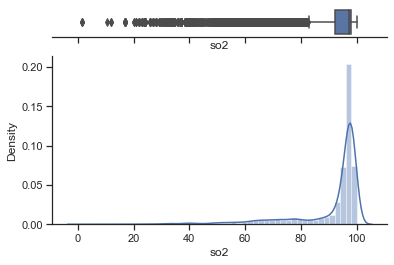

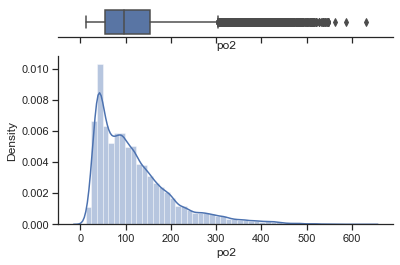

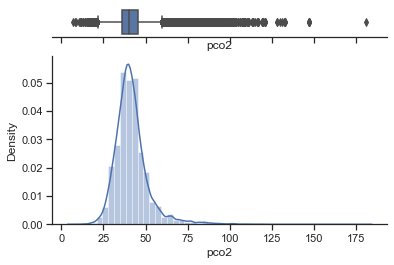

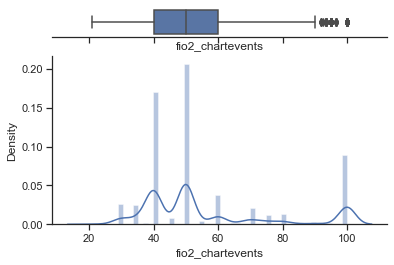

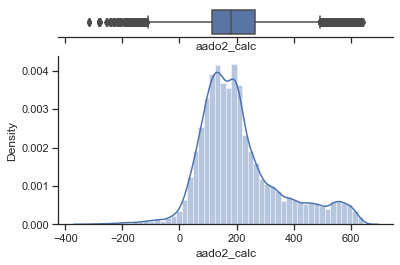

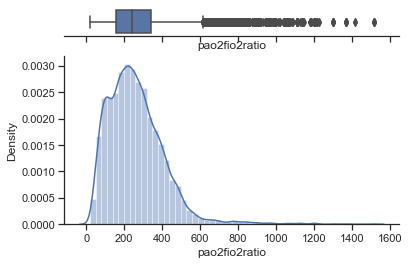

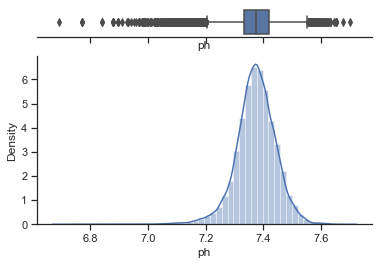

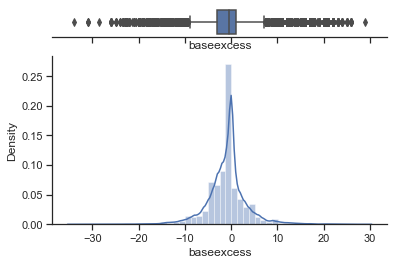

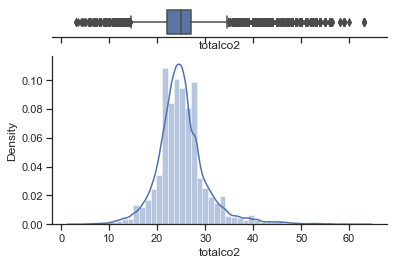

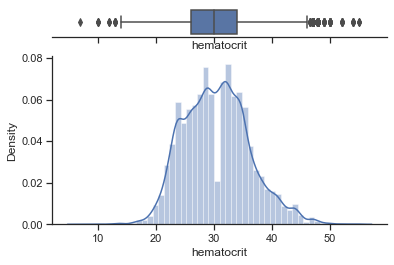

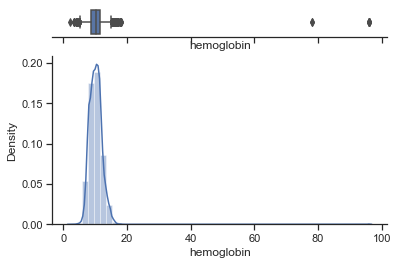

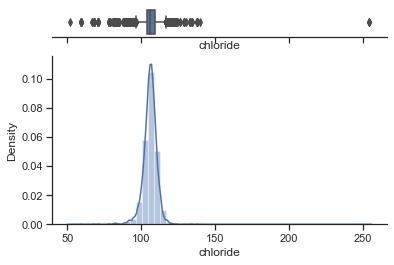

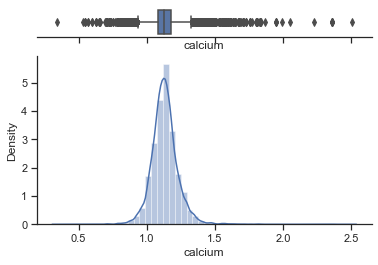

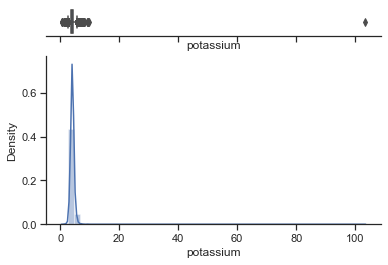

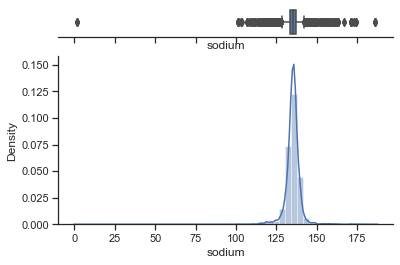

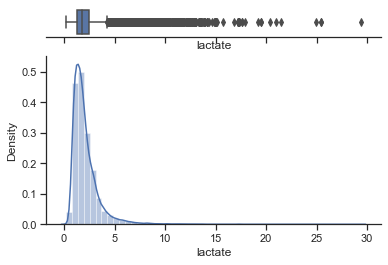

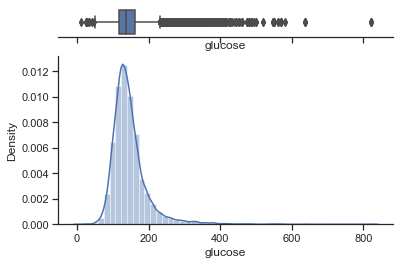

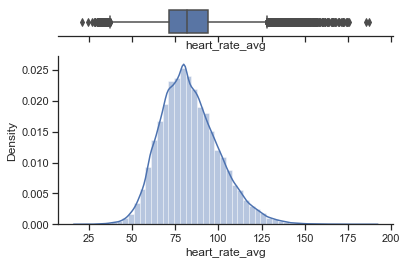

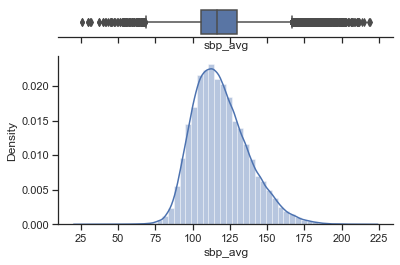

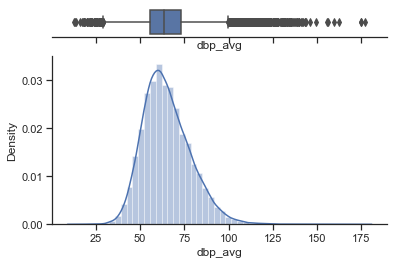

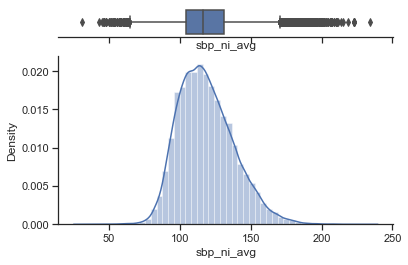

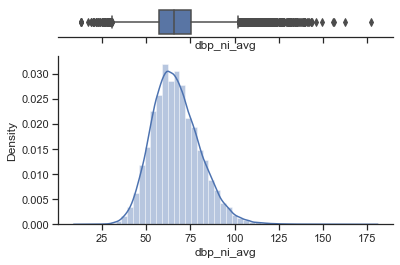

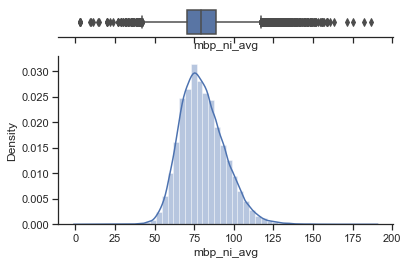

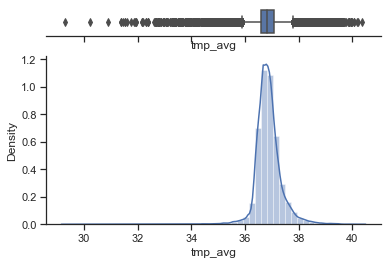

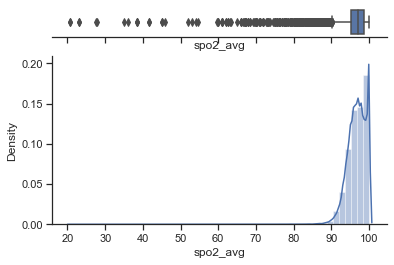

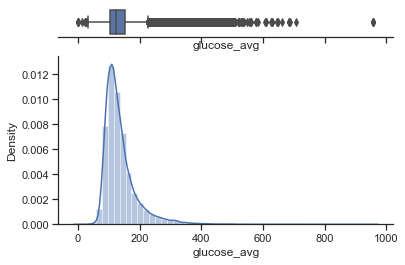

In [7]:
#histogram + botplot 
def hisBotPlot(dfX,X):
    sns.set(style="ticks")
    x = dfX[X]
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    sns.boxplot(x, ax=ax_box)
    sns.distplot(x, ax=ax_hist)
    ax_box.set(yticks=[])
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True)
    desTable = dfX[[X]].describe().T
    desTable["IQR"] = (desTable["75%"] - desTable["25%"])
    desTable["LCL"] = desTable["50%"]-desTable["IQR"]*4
    desTable["UCL"] = desTable["50%"]+desTable["IQR"]*4
    desTable = desTable.reset_index()
    print("%s UCL, LCL :" %X, desTable["LCL"][0], desTable["UCL"][0])
    return desTable

chartItems = ['so2', 'po2', 'pco2', 'fio2_chartevents', 'fio2', 'aado2', 'aado2_calc', 'pao2fio2ratio', 'ph', 
              'baseexcess', 'bicarbonate', 'totalco2', 'hematocrit', 'hemoglobin', 'carboxyhemoglobin', 'methemoglobin', 
              'chloride', 'calcium', 'temperature', 'potassium', 'sodium', 'lactate', 'glucose',
             'heart_rate_avg', 'sbp_avg', 'dbp_avg', 'sbp_ni_avg', 'dbp_ni_avg', 'mbp_ni_avg', 'tmp_avg', 'spo2_avg', 'glucose_avg']

for i in chartItems:
    if i in d2.columns: 
        globals()['outDF_{}'.format(i)] = hisBotPlot(d2, i)
    else:
        pass 
    
appended_data =[]
for name in dir():
    if name.startswith('outDF_'):
        appended_data.append(eval(name))
        
outDF = pd.concat(appended_data, ignore_index=True)
print(outDF.shape)

outDF =pd.concat(appended_data, ignore_index=True)
#outDF

In [22]:
#assign LCL or UCL to extreme values/outliers beyond LCL and UCL 
d3=d2.copy()

for i in chartItems:
    if i in d3.columns:
        #i = "Diastolic_blood_pressure"
        d3[i] = np.where(d3[i].isnull(), np.nan,
                         np.where(d3[i]>= chartLimit.loc[chartLimit["variable"]==i, "LLM"].values[0], d3[i], chartLimit.loc[chartLimit["variable"]==i, "LLM"].values[0]))
        d3[i] = np.where(d3[i].isnull(), np.nan,
                         np.where(d3[i]<= chartLimit.loc[chartLimit["variable"]==i, "ULM"].values[0], d3[i], chartLimit.loc[chartLimit["variable"]==i, "ULM"].values[0]))
    else:
        pass
    
print(d3.shape)
d3[[i for i in d3.columns if i in chartItems]].describe()

(123138, 62)


,so2,po2,pco2,fio2_chartevents,aado2_calc,pao2fio2ratio,ph,baseexcess,totalco2,hematocrit,hemoglobin,chloride,calcium,potassium,sodium,lactate,glucose,heart_rate_avg,sbp_avg,dbp_avg,sbp_ni_avg,dbp_ni_avg,mbp_ni_avg,tmp_avg,spo2_avg,glucose_avg
count,25180.000000,67997.000000,67994.000000,38569.000000,40011.000000,40011.000000,67994.000000,67994.000000,67994.000000,28179.000000,28187.000000,27693.000000,41131.000000,32634.000000,29326.000000,60253.000000,31488.000000,123097.000000,122479.000000,122472.000000,109544.000000,109537.000000,109521.000000,120375.000000,123080.000000,119568.000000
mean,90.849295,118.195623,41.710790,55.699384,208.954530,261.297820,7.373456,-0.865932,25.088276,30.495501,10.156379,105.910979,1.136549,4.121304,135.182089,2.103532,146.643024,83.425604,118.809929,65.178962,118.713969,66.918196,80.265756,36.879155,96.720576,136.201233
std,13.530428,83.500669,10.263754,21.153533,145.437641,145.088564,0.069366,4.199221,5.167799,5.652100,1.901541,4.764862,0.088980,0.622146,4.664025,1.389517,51.468494,17.059884,18.607589,13.455550,19.517356,13.627208,14.029241,0.485855,2.623417,52.965877
min,1.680000,32.000000,7.000000,21.000000,-319.100000,20.000000,6.690000,-16.500000,5.000000,7.000000,2.200000,52.000000,1.020000,0.700000,50.000000,0.400000,33.000000,21.000000,25.500000,13.000000,31.000000,13.000000,14.000000,29.300000,20.750000,33.000000
25%,92.000000,53.500000,36.000000,40.000000,114.262500,157.142857,7.333333,-3.000000,22.000000,26.000000,8.800000,104.000000,1.080000,3.700000,133.500000,1.300000,117.000000,71.250000,105.362500,55.666667,104.500000,57.500000,70.250000,36.611111,95.250000,102.750000
50%,97.000000,96.500000,40.000000,50.000000,179.200000,242.500000,7.375000,-0.500000,25.000000,30.000000,10.100000,106.000000,1.130000,4.100000,135.333333,1.750000,137.000000,81.583333,116.500000,63.500000,116.666667,65.750000,79.000000,36.833333,97.000000,122.500000
75%,98.000000,154.000000,45.500000,60.000000,265.050000,340.000000,7.420000,1.000000,27.000000,34.000000,11.333333,109.000000,1.180000,4.500000,137.000000,2.500000,162.500000,94.000000,130.000000,73.337500,131.000000,75.375000,89.000000,37.083333,98.600000,152.500000
max,100.000000,630.500000,181.000000,100.000000,643.750000,973.928571,7.700000,15.500000,45.000000,55.000000,25.000000,175.000000,2.505000,12.000000,186.000000,29.400000,821.000000,187.500000,219.000000,177.000000,234.000000,177.000000,186.800000,40.362500,100.000000,958.000000


# Imputation

In [24]:
print(list(d3.columns))

['stay_id', 'icu_intime', 'charttime', 'aki_charttime', 't_ICU2Chart', 't_ICU2AKI', 't_Chart2AKI', 'adm_age', 'weight', 'charlson_comorbidity_index', 'age_score', 'myocardial_infarct', 'congestive_heart_failure', 'peripheral_vascular_disease', 'cerebrovascular_disease', 'dementia', 'chronic_pulmonary_disease', 'rheumatic_disease', 'peptic_ulcer_disease', 'mild_liver_disease', 'diabetes_without_cc', 'diabetes_with_cc', 'paraplegia', 'renal_disease', 'malignant_cancer', 'severe_liver_disease', 'metastatic_solid_tumor', 'aids', 'so2', 'po2', 'pco2', 'fio2_chartevents', 'aado2_calc', 'pao2fio2ratio', 'ph', 'baseexcess', 'totalco2', 'hematocrit', 'hemoglobin', 'chloride', 'calcium', 'potassium', 'sodium', 'lactate', 'glucose', 'heart_rate_avg', 'sbp_avg', 'dbp_avg', 'sbp_ni_avg', 'dbp_ni_avg', 'mbp_ni_avg', 'tmp_avg', 'spo2_avg', 'glucose_avg', 'Med_Aminoglycosides', 'Med_Angiotensin', 'Med_Diuretics', 'Med_NSAID', 'Med_Vancomycin', 'Procedure_Ventilation', 'Procedure_Intubation_Extubation'

In [25]:
#Impute missing values using KNN
d4 = d3.sort_values(by=["stay_id", 'charttime']).reset_index(drop=True)

toImputeCols = DFmissingVales(d4)
toImputeCols = toImputeCols[toImputeCols["Count"]>0].index
toImputeCols1 = [i for i in toImputeCols if i not in ['aki_charttime', 't_Chart2AKI']]
print("Features to impute: ", toImputeCols1)

d4b = d4[[i for i in d4.columns if i not in ['stay_id', 'icu_intime', 'charttime', 'aki_charttime', 
                                            't_ICU2Chart', 't_ICU2AKI', 't_Chart2AKI',"AKI" ]]]
d4a = d4[[i for i in d4.columns if i not in d4b.columns]]

#d4b = d4[toImputeCols1]
print(d4a.shape, d4b.shape)

Total Number of Records       :  123138
Features to impute:  ['weight', 'so2', 'po2', 'pco2', 'fio2_chartevents', 'aado2_calc', 'pao2fio2ratio', 'ph', 'baseexcess', 'totalco2', 'hematocrit', 'hemoglobin', 'chloride', 'calcium', 'potassium', 'sodium', 'lactate', 'glucose', 'heart_rate_avg', 'sbp_avg', 'dbp_avg', 'sbp_ni_avg', 'dbp_ni_avg', 'mbp_ni_avg', 'tmp_avg', 'spo2_avg', 'glucose_avg']
(123138, 8) (123138, 54)


In [28]:
#take long to run (approximately 45 mins)
from sklearn.impute import KNNImputer
imputerKNN = KNNImputer(n_neighbors=5, weights="uniform")
imputerKNN.fit(d4b)
d4b_imputed= pd.DataFrame(imputerKNN.transform(d4b))
d4b_imputed.columns = d4b.columns
print(d4b_imputed.shape)

d5 = d4a.merge(d4b_imputed, left_index=True, right_index=True)
print(d5.shape)
#d5.to_csv(inputPath + "\\d_master_3hourlyCleaned.csv", index=False)

(123138, 54)
(123138, 62)


In [29]:
DFmissingVales(d5)

Total Number of Records       :  123138


,Count,Pct
stay_id,0,0.000
icu_intime,0,0.000
charttime,0,0.000
aki_charttime,73456,59.653
t_ICU2Chart,0,0.000
t_ICU2AKI,0,0.000
t_Chart2AKI,73456,59.653
AKI,0,0.000
adm_age,0,0.000
weight,0,0.000


# Aggregrated data

In [2]:
d6 = pd.read_csv(inputPath + "\\d_master_3hourlyCleaned.csv", index_col=None, parse_dates=['icu_intime', 'charttime', 'aki_charttime'])
print(d6.shape)
print(len(d6["stay_id"].unique()))
print(list(d6.columns))

(123138, 62)
20809
['stay_id', 'icu_intime', 'charttime', 'aki_charttime', 't_ICU2Chart', 't_ICU2AKI', 't_Chart2AKI', 'AKI', 'adm_age', 'weight', 'charlson_comorbidity_index', 'age_score', 'myocardial_infarct', 'congestive_heart_failure', 'peripheral_vascular_disease', 'cerebrovascular_disease', 'dementia', 'chronic_pulmonary_disease', 'rheumatic_disease', 'peptic_ulcer_disease', 'mild_liver_disease', 'diabetes_without_cc', 'diabetes_with_cc', 'paraplegia', 'renal_disease', 'malignant_cancer', 'severe_liver_disease', 'metastatic_solid_tumor', 'aids', 'so2', 'po2', 'pco2', 'fio2_chartevents', 'aado2_calc', 'pao2fio2ratio', 'ph', 'baseexcess', 'totalco2', 'hematocrit', 'hemoglobin', 'chloride', 'calcium', 'potassium', 'sodium', 'lactate', 'glucose', 'heart_rate_avg', 'sbp_avg', 'dbp_avg', 'sbp_ni_avg', 'dbp_ni_avg', 'mbp_ni_avg', 'tmp_avg', 'spo2_avg', 'glucose_avg', 'Med_Aminoglycosides', 'Med_Angiotensin', 'Med_Diuretics', 'Med_NSAID', 'Med_Vancomycin', 'Procedure_Ventilation', 'Proced

In [3]:
chartItems = ['so2', 'po2', 'pco2', 'fio2_chartevents', 'aado2_calc', 'pao2fio2ratio', 
              'ph', 'baseexcess', 'totalco2', 'hematocrit', 'hemoglobin', 'chloride', 
              'calcium', 'potassium', 'sodium', 'lactate', 'glucose', 'heart_rate_avg', 'sbp_avg', 
              'dbp_avg', 'sbp_ni_avg', 'dbp_ni_avg', 'mbp_ni_avg', 'tmp_avg', 'spo2_avg', 'glucose_avg']

#get the Aggregated data 
dTemp = d6[["stay_id"]+chartItems]
dTemp1 = dTemp.groupby(["stay_id"]).agg({'po2': ["min", "max", 'median', "mean", "std"]}).reset_index()
dTemp1.columns = ["_".join(x) for x in dTemp1.columns.ravel()]
print(dTemp1.shape)

for i in chartItems: 
    if i == 'po2':
        pass
    else: 
        dTemp2 = dTemp.groupby(["stay_id"]).agg({i: ["min", "max", 'median', "mean", "std"]}).reset_index()
        dTemp2.columns = ["_".join(x) for x in dTemp2.columns.ravel()]
        dTemp1 = dTemp1.merge(dTemp2, on="stay_id_", how="outer")
    
dTemp1 = dTemp1.rename(columns={"stay_id_" : "stay_id"})
dTemp1 = dTemp1.fillna(0)
print(dTemp1.shape)
dTemp1.head(3)

(20809, 6)
(20809, 131)


,stay_id,po2_min,po2_max,po2_median,po2_mean,po2_std,so2_min,so2_max,so2_median,so2_mean,so2_std,pco2_min,pco2_max,pco2_median,pco2_mean,pco2_std,fio2_chartevents_min,fio2_chartevents_max,fio2_chartevents_median,fio2_chartevents_mean,fio2_chartevents_std,aado2_calc_min,aado2_calc_max,aado2_calc_median,aado2_calc_mean,aado2_calc_std,pao2fio2ratio_min,pao2fio2ratio_max,pao2fio2ratio_median,pao2fio2ratio_mean,pao2fio2ratio_std,ph_min,ph_max,ph_median,ph_mean,ph_std,baseexcess_min,baseexcess_max,baseexcess_median,baseexcess_mean,baseexcess_std,totalco2_min,totalco2_max,totalco2_median,totalco2_mean,totalco2_std,hematocrit_min,hematocrit_max,hematocrit_median,hematocrit_mean,hematocrit_std,hemoglobin_min,hemoglobin_max,hemoglobin_median,hemoglobin_mean,hemoglobin_std,chloride_min,chloride_max,chloride_median,chloride_mean,chloride_std,calcium_min,calcium_max,calcium_median,calcium_mean,calcium_std,potassium_min,potassium_max,potassium_median,potassium_mean,potassium_std,sodium_min,sodium_max,sodium_median,sodium_mean,sodium_std,lactate_min,lactate_max,lactate_median,lactate_mean,lactate_std,glucose_min,glucose_max,glucose_median,glucose_mean,glucose_std,heart_rate_avg_min,heart_rate_avg_max,heart_rate_avg_median,heart_rate_avg_mean,heart_rate_avg_std,sbp_avg_min,sbp_avg_max,sbp_avg_median,sbp_avg_mean,sbp_avg_std,dbp_avg_min,dbp_avg_max,dbp_avg_median,dbp_avg_mean,dbp_avg_std,sbp_ni_avg_min,sbp_ni_avg_max,sbp_ni_avg_median,sbp_ni_avg_mean,sbp_ni_avg_std,dbp_ni_avg_min,dbp_ni_avg_max,dbp_ni_avg_median,dbp_ni_avg_mean,dbp_ni_avg_std,mbp_ni_avg_min,mbp_ni_avg_max,mbp_ni_avg_median,mbp_ni_avg_mean,mbp_ni_avg_std,tmp_avg_min,tmp_avg_max,tmp_avg_median,tmp_avg_mean,tmp_avg_std,spo2_avg_min,spo2_avg_max,spo2_avg_median,spo2_avg_mean,spo2_avg_std,glucose_avg_min,glucose_avg_max,glucose_avg_median,glucose_avg_mean,glucose_avg_std
0,30001535,132.0,132.0,132.0,132.000000,0.00000,86.5,86.5,86.5,86.500000,0.000000,28.0,28.00,28.0,28.000000,0.000000,40.0,40.0,40.0,40.000000,0.000000,118.20,118.200,118.200,118.200000,0.000000,330.00,330.000000,330.00,330.000000,0.000000,7.3800,7.380,7.380,7.380000,0.000000,-6.0,-6.0,-6.0,-6.0,0.000000,17.0,17.0,17.0,17.000000,0.000000,31.500000,31.50,31.5,31.500000,0.000000,10.520000,10.520,10.52,10.52000,0.000000,107.400000,107.4,107.4,107.400000,0.000000,1.080,1.080,1.080000,1.080000,0.000000,4.20,4.20,4.200000,4.200000,0.000000,135.2,135.2,135.2,135.200000,0.000000,3.00,3.00,3.000,3.000000,0.000000,192.1,192.1,192.1,192.100000,0.000000,108.5,108.500000,108.5,108.50000,0.000000,102.5,102.5,102.50,102.500000,0.000000,77.0,77.0,77.00,77.000000,0.000000,102.5,102.5,102.50,102.500000,0.000000,77.00,77.0,77.00,77.000000,0.000000,83.00,83.0,83.0,83.000000,0.000000,36.833333,36.833333,36.833333,36.833333,0.000000,99.5,99.5,99.5,99.500000,0.000000,140.0,140.0,140.0,140.000000,0.000000
1,30002052,75.1,188.4,127.6,119.094286,41.94232,72.2,97.0,91.6,87.147619,9.137060,35.8,51.52,38.9,43.031429,7.087001,34.0,62.0,57.0,51.857143,11.810004,81.33,280.560,157.450,158.547000,73.028457,207.20,411.428571,319.90,313.032313,75.484822,7.3464,7.368,7.364,7.361057,0.008852,-3.6,2.4,-2.3,-0.8,2.786276,21.4,30.0,23.1,25.497143,4.027579,22.666667,36.80,28.5,28.759524,4.330104,7.566667,12.220,9.52,9.58381,1.424816,103.000000,108.6,104.6,105.300000,1.815673,1.136,1.211,1.176667,1.174238,0.023572,3.24,4.26,3.750000,3.781429,0.357837,132.0,138.0,134.7,135.114286,2.287232,1.20,5.18,2.060,2.275714,1.352773,128.0,181.8,138.8,147.528571,20.460752,58.5,86.000000,74.0,71.25000,9.479144,103.5,129.0,119.50,118.297619,8.196072,69.5,91.0,71.00,74.976190,7.697660,103.5,129.0,119.50,118.035714,8.055056,69.75,91.0,71.00,75.011905,7.668543,81.75,102.0,85.5,88.035714,6.592971,36.500000,36.555556,36.555556,36.547619,0.020998,95.0,98.0,96.0,96.178571,0.975900,125.0,188.0,164.0,161.000000,22.583180
2,30002095,147.0,147.0,147.0,147.000000,0.00000,82.2,97.7,96.4,92.471429,6.620854,46.0,46.00,46.0,46.000000,0.000000,46.0,64.0,58.0,55.809524,6.517376,135.73,256.5

In [4]:
#each patient can have >1 specimen_pred and specimen_prob!!!
#==============
#get medications
#==============
#medication
#'Med_Aminoglycosides', 'Med_Angiotensin', 'Med_Diuretics', 'Med_NSAID', 'Med_Vancomycin'
medCols = [i for i in d6.columns if i.startswith("Med")]
dMed = d6[["stay_id"]+medCols]
dMed= dMed.dropna()
dMed = dMed.drop_duplicates()

dMed1 = dMed.groupby(["stay_id"]).max().reset_index()
dMed1.head(3)

#==============
#get demo data
#==============
#columns related to charlson_comorbidity_index 
CCI = ['age_score',"weight", 'myocardial_infarct', 'congestive_heart_failure', 'peripheral_vascular_disease', 'cerebrovascular_disease', 'dementia', 
       'chronic_pulmonary_disease', 'rheumatic_disease', 'peptic_ulcer_disease', 'mild_liver_disease', 'diabetes_without_cc', 'diabetes_with_cc', 
       'paraplegia', 'renal_disease', 'malignant_cancer', 'severe_liver_disease', 'metastatic_solid_tumor', 'aids','Procedure_Ventilation', 'Procedure_Intubation_Extubation' ] #'age_score', 

demo = ['AKI',"icu_intime", 'adm_age',  'charlson_comorbidity_index'] + CCI 
demo_df = d6[["stay_id"] + demo].drop_duplicates()
print(demo_df.shape)

(21293, 26)


In [6]:
d_agg = demo_df.merge(dTemp1, on="stay_id", how='left')
d_agg = d_agg.merge(dMed1, on="stay_id", how='left')
#d_agg.to_csv(inputPath + "\\d_master_aggregrated.csv", index=False)
print(d_agg.shape)
print(list(d_agg.columns))
d_agg.head(3)

(21293, 161)
['stay_id', 'AKI', 'icu_intime', 'adm_age', 'charlson_comorbidity_index', 'age_score', 'weight', 'myocardial_infarct', 'congestive_heart_failure', 'peripheral_vascular_disease', 'cerebrovascular_disease', 'dementia', 'chronic_pulmonary_disease', 'rheumatic_disease', 'peptic_ulcer_disease', 'mild_liver_disease', 'diabetes_without_cc', 'diabetes_with_cc', 'paraplegia', 'renal_disease', 'malignant_cancer', 'severe_liver_disease', 'metastatic_solid_tumor', 'aids', 'Procedure_Ventilation', 'Procedure_Intubation_Extubation', 'po2_min', 'po2_max', 'po2_median', 'po2_mean', 'po2_std', 'so2_min', 'so2_max', 'so2_median', 'so2_mean', 'so2_std', 'pco2_min', 'pco2_max', 'pco2_median', 'pco2_mean', 'pco2_std', 'fio2_chartevents_min', 'fio2_chartevents_max', 'fio2_chartevents_median', 'fio2_chartevents_mean', 'fio2_chartevents_std', 'aado2_calc_min', 'aado2_calc_max', 'aado2_calc_median', 'aado2_calc_mean', 'aado2_calc_std', 'pao2fio2ratio_min', 'pao2fio2ratio_max', 'pao2fio2ratio_media

,stay_id,AKI,icu_intime,adm_age,charlson_comorbidity_index,age_score,weight,myocardial_infarct,congestive_heart_failure,peripheral_vascular_disease,cerebrovascular_disease,dementia,chronic_pulmonary_disease,rheumatic_disease,peptic_ulcer_disease,mild_liver_disease,diabetes_without_cc,diabetes_with_cc,paraplegia,renal_disease,malignant_cancer,severe_liver_disease,metastatic_solid_tumor,aids,Procedure_Ventilation,Procedure_Intubation_Extubation,po2_min,po2_max,po2_median,po2_mean,po2_std,so2_min,so2_max,so2_median,so2_mean,so2_std,pco2_min,pco2_max,pco2_median,pco2_mean,pco2_std,fio2_chartevents_min,fio2_chartevents_max,fio2_chartevents_median,fio2_chartevents_mean,fio2_chartevents_std,aado2_calc_min,aado2_calc_max,aado2_calc_median,aado2_calc_mean,aado2_calc_std,pao2fio2ratio_min,pao2fio2ratio_max,pao2fio2ratio_median,pao2fio2ratio_mean,pao2fio2ratio_std,ph_min,ph_max,ph_median,ph_mean,ph_std,baseexcess_min,baseexcess_max,baseexcess_median,baseexcess_mean,baseexcess_std,totalco2_min,totalco2_max,totalco2_median,totalco2_mean,totalco2_std,hematocrit_min,hematocrit_max,hematocrit_median,hematocrit_mean,hematocrit_std,hemoglobin_min,hemoglobin_max,hemoglobin_median,hemoglobin_mean,hemoglobin_std,chloride_min,chloride_max,chloride_median,chloride_mean,chloride_std,calcium_min,calcium_max,calcium_median,calcium_mean,calcium_std,potassium_min,potassium_max,potassium_median,potassium_mean,potassium_std,sodium_min,sodium_max,sodium_median,sodium_mean,sodium_std,lactate_min,lactate_max,lactate_median,lactate_mean,lactate_std,glucose_min,glucose_max,glucose_median,glucose_mean,glucose_std,heart_rate_avg_min,heart_rate_avg_max,heart_rate_avg_median,heart_rate_avg_mean,heart_rate_avg_std,sbp_avg_min,sbp_avg_max,sbp_avg_median,sbp_avg_mean,sbp_avg_std,dbp_avg_min,dbp_avg_max,dbp_avg_median,dbp_avg_mean,dbp_avg_std,sbp_ni_avg_min,sbp_ni_avg_max,sbp_ni_avg_median,sbp_ni_avg_mean,sbp_ni_avg_std,dbp_ni_avg_min,dbp_ni_avg_max,dbp_ni_avg_median,dbp_ni_avg_mean,dbp_ni_avg_std,mbp_ni_avg_min,mbp_ni_avg_max,mbp_ni_avg_median,mbp_ni_avg_mean,mbp_ni_avg_std,tmp_avg_min,tmp_avg_max,tmp_avg_median,tmp_avg_mean,tmp_avg_std,spo2_avg_min,spo2_avg_max,spo2_avg_median,spo2_avg_mean,spo2_avg_std,glucose_avg_min,glucose_avg_max,glucose_avg_median,glucose_avg_mean,glucose_avg_std,Med_Aminoglycosides,Med_Angiotensin,Med_Diuretics,Med_NSAID,Med_Vancomycin
0,30001535,1,2177-11-17 20:30:00,69.0,6.0,3.0,80.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,132.0,132.0,132.0,132.000000,0.00000,86.5,86.5,86.5,86.500000,0.000000,28.0,28.00,28.0,28.000000,0.000000,40.0,40.0,40.0,40.000000,0.000000,118.20,118.200,118.200,118.200000,0.000000,330.00,330.000000,330.00,330.000000,0.000000,7.3800,7.380,7.380,7.380000,0.000000,-6.0,-6.0,-6.0,-6.0,0.000000,17.0,17.0,17.0,17.000000,0.000000,31.500000,31.50,31.5,31.500000,0.000000,10.520000,10.520,10.52,10.52000,0.000000,107.400000,107.4,107.4,107.400000,0.000000,1.080,1.080,1.080000,1.080000,0.000000,4.20,4.20,4.200000,4.200000,0.000000,135.2,135.2,135.2,135.200000,0.000000,3.00,3.00,3.000,3.000000,0.000000,192.1,192.1,192.1,192.100000,0.000000,108.5,108.500000,108.5,108.50000,0.000000,102.5,102.5,102.50,102.500000,0.000000,77.0,77.0,77.00,77.000000,0.000000,102.5,102.5,102.50,102.500000,0.000000,77.00,77.0,77.00,77.000000,0.000000,83.00,83.0,83.0,83.000000,0.000000,36.833333,36.833333,36.833333,36.833333,0.000000,99.5,99.5,99.5,99.500000,0.000000,140.0,140.0,140.0,140.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,30002052,1,2180-12-30 05:24:46,63.0,9.0,3.0,56.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,75.1,188.4,127.6,119.094286,41.94232,72.2,97.0,91.6,87.147619,9.137060,35.8,51.52,38.9,43.031429,7.087001,34.0,62.0,57.0,51.857143,11.810004,81.33,280.560,157.450,158.547000,73.028457,207.20,411.428571,319.90,313.032313,75.484822,7.3464,7.368,7.364,7.361057,0.008852,-3.6,2.4,-2.3,-0.8,2.786276,21.4,30.0,23.1,25.497143,4.027579,22.666667,36.80,28.5,28.759524,4.330104,7.566667,12